# DIFFERENCE BETWEEN GS AND TEMPLATES

In [ ]:
import pandas as pd
comp = 1
df_gs = pd.read_csv(f'./A{comp}B/relaxation/GroundStates.txt', header=None, na_filter=False)
df_temp = pd.read_csv(f'./A{comp}B/relaxation/RELAX_DATA', header=None, na_filter=False)
ticks_labels = []
for i in range(1,len(df_temp.columns)):
    ticks_labels.append(df_temp.loc[0,i])

for i in range(1,len(df_temp[0])):
    diff = np.zeros(len(df_temp.columns)-1)
    for j in range(1,len(df_temp.columns)):
        
        diff[j-1] = float(df_temp.loc[i,j])-float(df_gs[df_gs[0]==df_temp.loc[i,0]][1].values[0])
        if diff[j-1] < -0.1:
            print(df_temp.loc[i,0], ticks_labels[j-1], diff[j-1])
    if (min(diff) < -0.1):

        plt.bar(np.arange(1,len(df_temp.columns)), diff)
        plt.title(df_temp.loc[i,0])
        plt.xticks(np.arange(1,len(df_temp.columns)), ticks_labels, fontsize=8)
        plt.show()


# MEDIUM ERR VS TEMP EXTRACTED


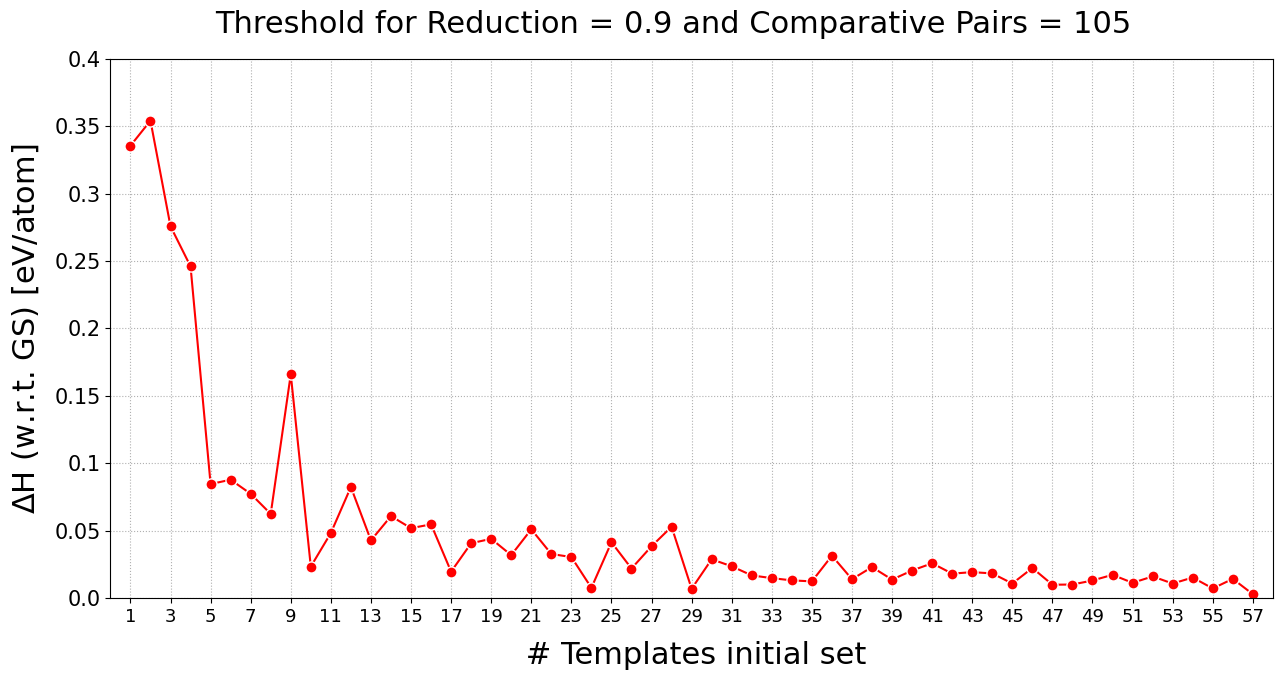

In [6]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'
n_possible_couples = 105
n_sets = 5

title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)

dir_name = 'FULLTRY'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
tot = (df_tot.to_numpy()).T

x = np.arange(1, 78) 
toremove = []
for idx, i in enumerate(tot[0]):
    if i < 0.0001:
        toremove.append(idx)

x = np.delete(x, toremove)
tot = np.delete(tot, toremove, axis=1)

color = 'red'
ax.plot(x[:57], tot[1][:57]/(n_possible_couples), color = color , marker = 'o', markeredgecolor='white', markersize=8)

ax.set_ylabel(r'$\Delta$H (w.r.t. GS) [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.06, 0.5)

step = 0.1
y_ticks  = np.linspace(0,0.4,9)
y_ticks = np.round(y_ticks, decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=15)
ax.grid(True, ls=':')
ax.set_ylim(0,0.4)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.08)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,58)
ax.set_xticklabels(xticks, fontsize=13, rotation=0)

plt.show()
fig.savefig('EnStd_InTemp.png')

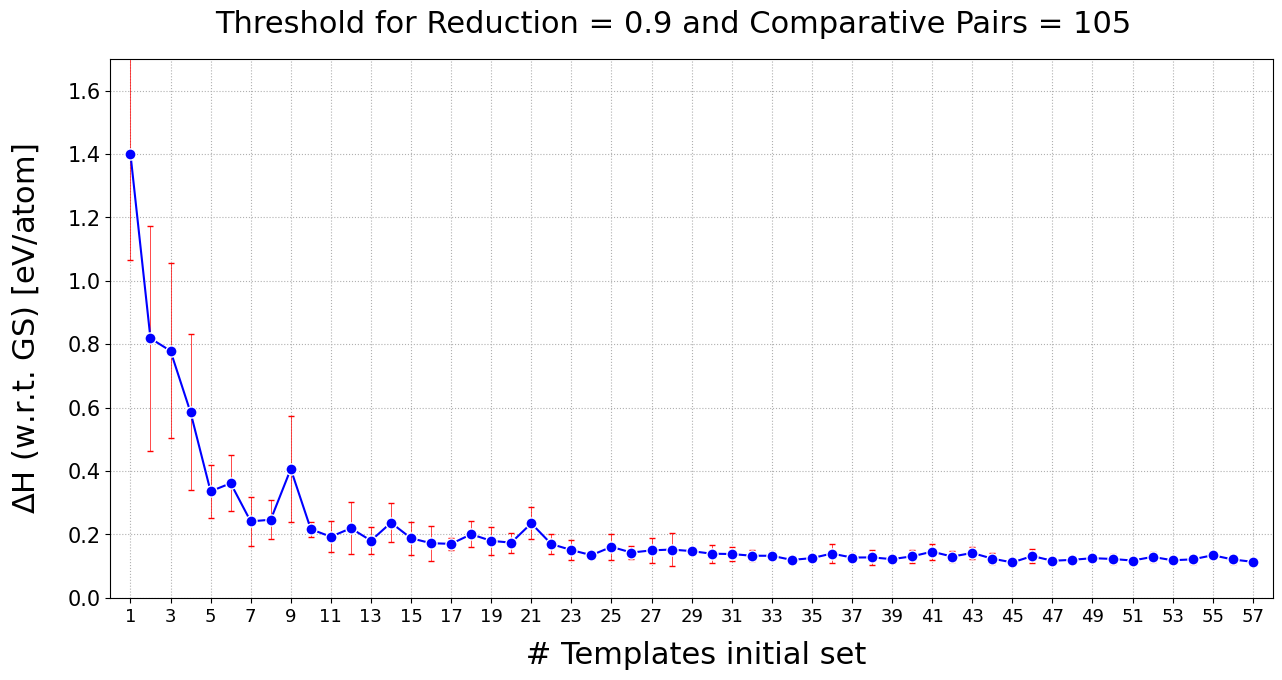

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'
n_possible_couples = 105
n_sets = 5

title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)

dir_name = 'FULLTRY'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
tot = (df_tot.to_numpy()).T

x = np.arange(1, 78) 
toremove = []
for idx, i in enumerate(tot[0]):
    if i < 0.0001:
        toremove.append(idx)

x = np.delete(x, toremove)
tot = np.delete(tot, toremove, axis=1)

color = 'blue'
ax.errorbar(x[:57], tot[0][:57]/n_possible_couples, yerr=tot[1][:57]/(n_possible_couples), color = color , ecolor='red', elinewidth=0.5, capsize=2, marker = 'o', markeredgecolor='white', markersize=8)

ax.set_ylabel(r'$\Delta$H (w.r.t. GS) [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.06, 0.5)

step = 0.2
y_ticks  = np.arange(0.0,1.7,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=15)
ax.grid(True, ls=':')
ax.set_ylim(0,1.7)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.08)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,58)
ax.set_xticklabels(xticks, fontsize=13, rotation=0)

plt.show()
fig.savefig('EnErr_InTemp.png')

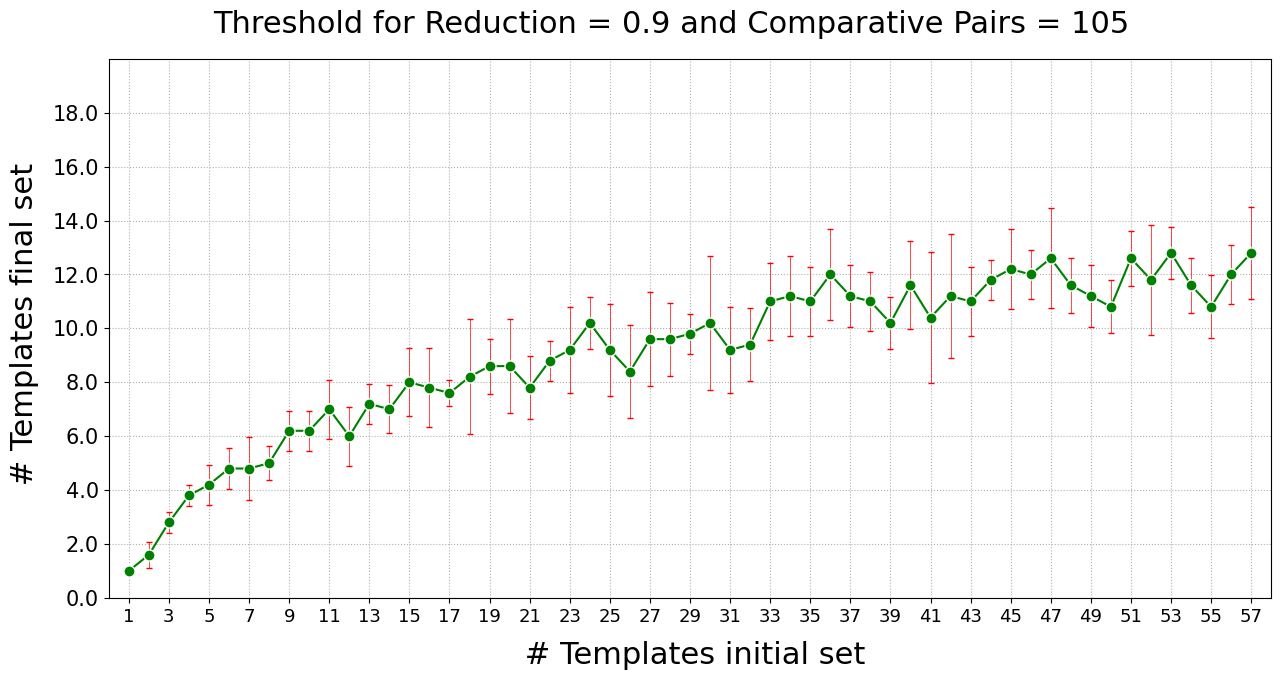

In [5]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'
n_possible_couples = 105
n_sets = 5

title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)

dir_name = 'FULLTRY'
df_numtemp = pd.read_csv(mother_dir + f'{dir_name}/NumberTempRedu.csv', header=None, na_filter = False, index_col = 0)
numtemp = df_numtemp.to_numpy()

x = np.arange(1, 78) 
toremove = []
for idx, i in enumerate(numtemp[0]):
    if i < 0.0001:
        toremove.append(idx)

x = np.delete(x, toremove)
numtemp = np.delete(numtemp, toremove, axis=1)

color = 'green'
ax.errorbar(x[:57], numtemp[0][:57], yerr=numtemp[1][:57], color = color , ecolor='red', elinewidth=0.5, capsize=2, marker = 'o', markeredgecolor='white', markersize=8)

ax.set_ylabel(' # Templates final set', fontsize=22)
ax.yaxis.set_label_coords(-0.06, 0.5)

step = 2
y_ticks  = np.arange(0,20,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=0)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=15)
ax.grid(True, ls=':')
ax.set_ylim(0,20)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.08)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,58)
ax.set_xticklabels(xticks, fontsize=13, rotation=0)

step = 2
y_ticks  = np.arange(0,18,step)
y_ticks = y_ticks.astype(int)

plt.show()
fig.savefig('NumTemp_InTemp.png')

# MEDIUM ERROR FOR EACH COUPLE WITH GIVEN TEMPLATE EXTRACTED

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
tlabels = []
count = 0
comp = 1
mother_dir = './'
dir_name = 'FULLTRY'

df_stds = pd.read_csv(mother_dir + f'{dir_name}/StdsEveryCouple.csv', header=None, na_filter=False, index_col = 0)
stds = df_stds.to_numpy()
df_means = pd.read_csv(mother_dir + f'{dir_name}/MeansEveryCouple.csv', header=None, na_filter=False, index_col = 0)
means = df_means.to_numpy()

if comp == 1:
    tlabels = []
    for i in range(len(test_elements)):
        for j in range(i+1,len(test_elements)):
            couple = [test_elements[i], test_elements[j]]
            couple.sort()
            tlabels.append(couple[0]+couple[1])
else:
    for k in range(len(test_elements)):
        for l in range(len(test_elements)):
            if k == l:
                continue
            count += 1
            cp = [test_elements[k], test_elements[l]]
            tlabels.append(cp[0]+cp[1])
                    
for idx,i in enumerate(range(10,11)): # NUMERO DI TEMPLATE DA ESTRARRE
    fig, ax1 = plt.subplots(1,1, figsize=(20, 10))
    color_value = cm.viridis(idx/4)
    ax1.set_title(r'$\Delta H$ for each couple with '+f'{i+1} templates')
    ax1.grid(linestyle=':')

    ax1.bar(np.arange(len(tlabels)), means[i], yerr=stds[i], color=color_value, edgecolor='black', capsize=2)
    ax1.set_xticks(np.arange(len(tlabels)))
    ax1.set_xticklabels(tlabels, fontsize=8, rotation = 90)
    ax1.set_xlim(-1,len(tlabels))

    ax1.set_ylim(-1,2)
    plt.show()

# MEAN ERR vs NTEMP FINAL

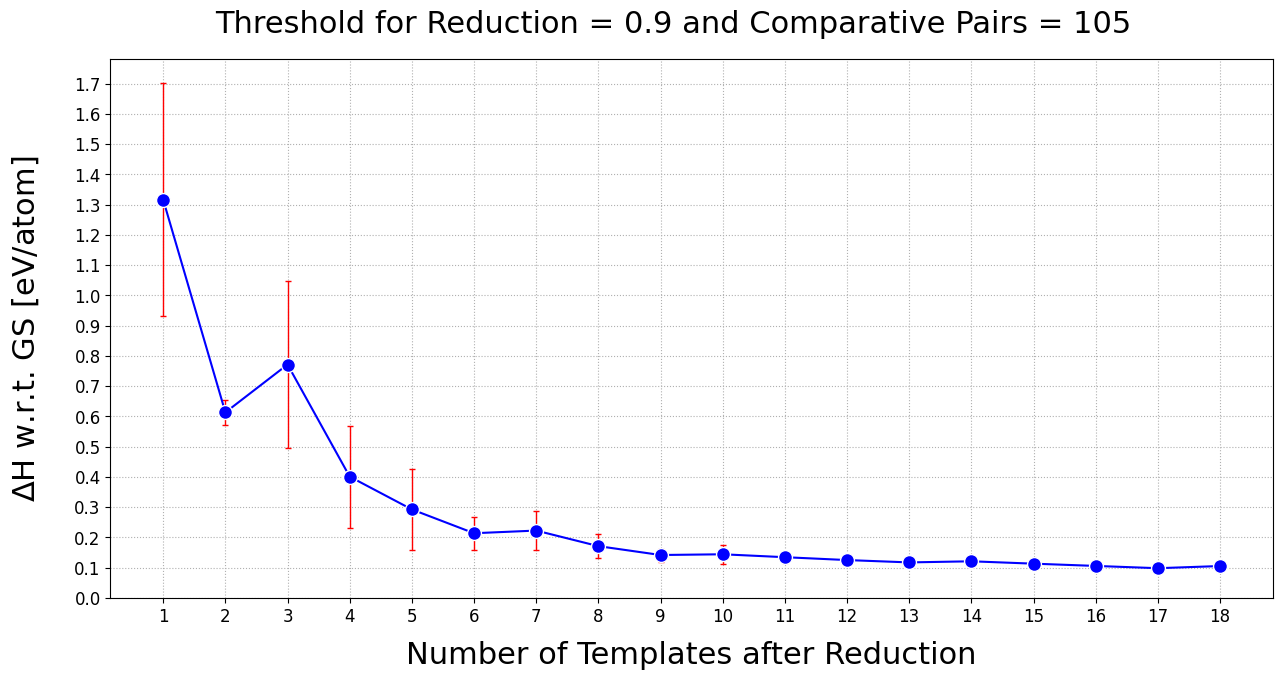

In [7]:
""" import os
import numpy as np
import matplotlib.pyplot as plt
from template_csp import managetemp as mte
from tqdm import tqdm
test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}

mother_dir = './FULLTRY/'
n_sets = 5

errors = {}
for i in tqdm(os.listdir(mother_dir)):
    if i.endswith('.csv') or i.endswith('.json'):
        continue
    for j in range(n_sets):

        template_set = mte.TemplateSet(test_elements, mother_dir + i + f'/TemplateSet_{j}')
        reduction_set = mte.PairSet(template_set, test_elements, mother_dir + i + f'/PairSet_{j}')
        n_finale_temp = len(reduction_set.reduced_set(hyperparameters))
        error = reduction_set.total_error(hyperparameters)

        if f'{n_finale_temp}' in errors.keys():
            errors[f'{n_finale_temp}'] = np.append(errors[f'{n_finale_temp}'], error)
        else:
            errors[f'{n_finale_temp}'] = np.array([error]) """
import json 
with open('NTempFin_Err.json', 'r') as f:
    errors = json.load(f)
    
n_temp = np.zeros(len(errors.keys()))
stds = np.zeros(len(errors.keys()))
en = np.zeros(len(errors.keys()))

for idx, i in enumerate(errors.keys()):
    n_temp[idx] = int(i)
    en[idx] = np.mean(np.array(errors[i]))
    stds[idx] = np.std(np.array(errors[i]))


title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)

sorted_idx = np.argsort(n_temp)
n_temp = n_temp[sorted_idx]
en = en[sorted_idx]
stds = stds[sorted_idx]

ax.errorbar(n_temp, en, yerr=stds, color = 'blue', ecolor='red', elinewidth=1, capsize=2, marker = 'o',markersize = 10,  markeredgecolor='white')

n_temp = n_temp.astype(int)
ax.set_xticks(n_temp)
ax.set_xticklabels(n_temp, fontsize=12)
ax.set_xlabel('Number of Templates after Reduction', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.08)

yticks = np.arange(0, 1.8, 0.1)
yticks = np.round(yticks, decimals=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)
ax.set_ylabel(r'$\Delta$H w.r.t. GS [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.06, 0.5)

ax.grid(True, ls=':')
fig.savefig('../LaTeX/Figure Risultati/NTempFin_Err.png')


# ERR vs NTEP FINAL NEW METHOD

In [ ]:
import os
import numpy as np
from template_csp import managetemp2 as mte

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "n_final_templates" : None,
}

mother_dir = './FULLTRY/'
n_sets = 5

nmin , nmax = 1, 15+1
EnErr = np.zeros((2, int(nmax-nmin/2),77))
ErrSets = np.zeros((int(nmax-nmin/2), 77, n_sets))

for i in os.listdir(mother_dir):
    if i.endswith('.csv') or i.endswith('.json'):
        continue
    for j in range(n_sets):
        template_set = mte.TemplateSet(test_elements, mother_dir + i + f'/TemplateSet_{j}')

        for n_fin in range(nmin, nmax,2):
            hyperparameters["n_final_templates"] = n_fin
            reduction_set = mte.PairSet(template_set, test_elements, mother_dir + i + f'/PairSet_{j}')
            ErrSets[int((n_fin-nmin)/2), int(i)-1, j] = reduction_set.total_error(hyperparameters)

EnErr[0] = np.mean(ErrSets, axis=2)
EnErr[1] = np.std(ErrSets, axis=2)

# EXPECT TO LAST 13 minutes


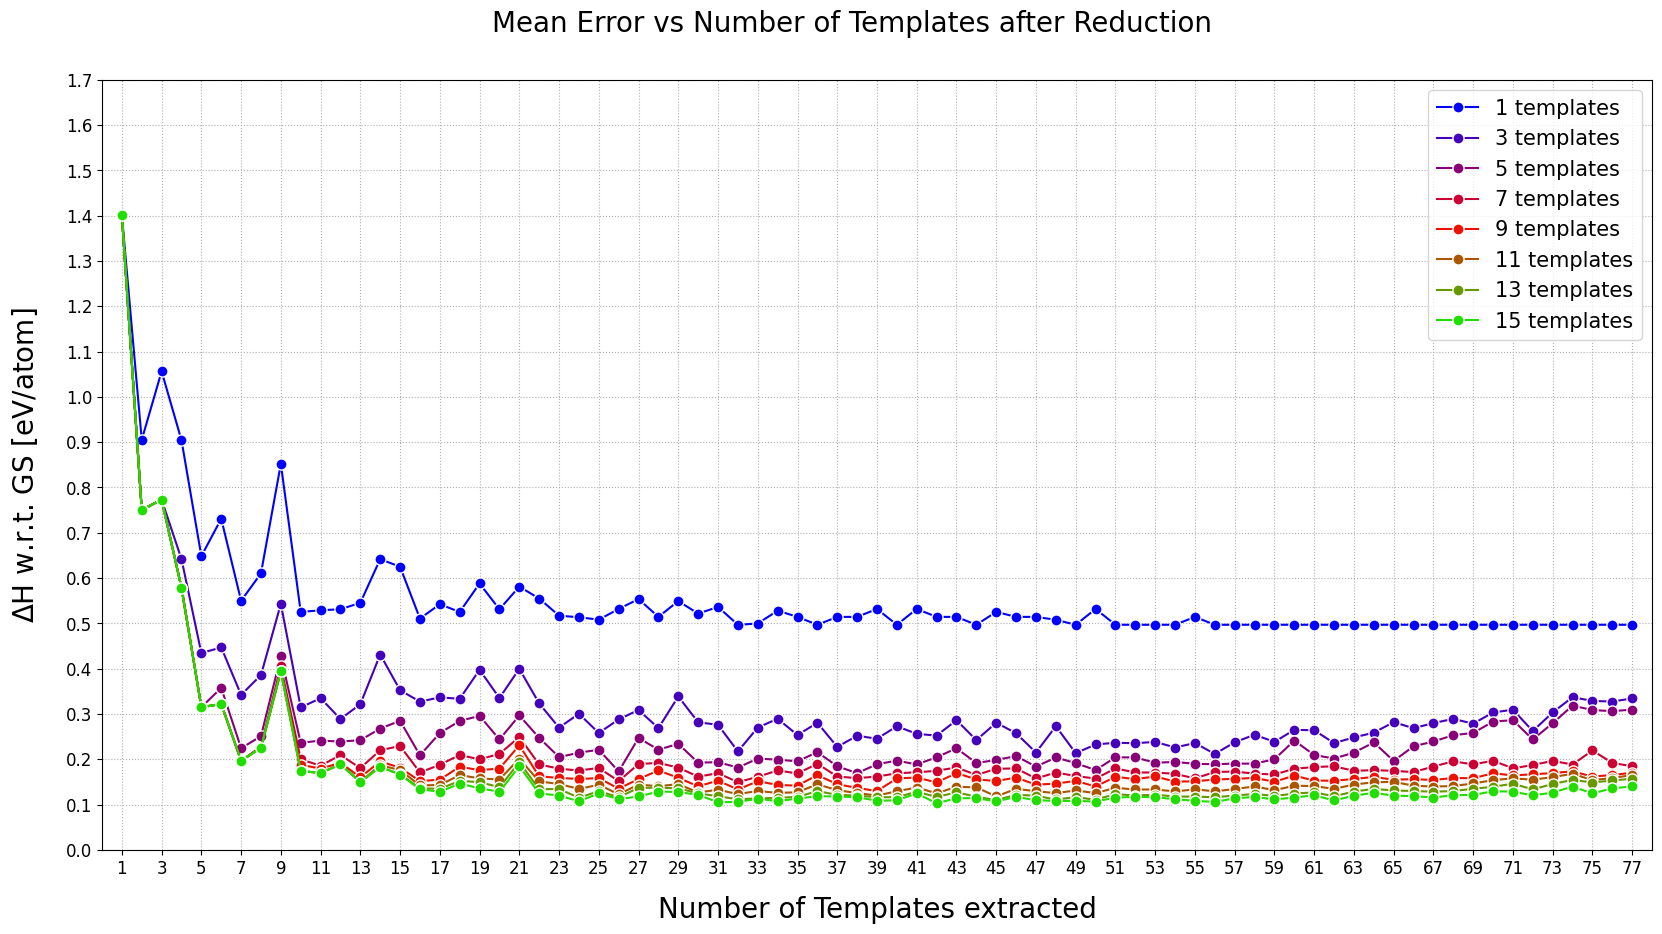

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

EnErr = np.zeros((2, 8, 77))

EnErr[0] = pd.read_csv('MeansFixedNFinal.csv', header=None, na_filter=False).to_numpy()
EnErr[1] = pd.read_csv('StdsFixedNFinal.csv', header=None, na_filter=False).to_numpy()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
title = f'Mean Error vs Number of Templates after Reduction'
fig.suptitle(title, fontsize=20, y = 0.95)

for n_fin in range(nmin, nmax,2):
    color = cm.brg((n_fin-nmin)/(nmax-nmin))
    #ax.errorbar(np.arange(1,78, dtype=int), EnErr[0,int((n_fin-nmin)/2),:], yerr=EnErr[1,int((n_fin-nmin)/2),:], color = color, ecolor='red', elinewidth=1, capsize=2, marker = 'o',markersize = 8,  markeredgecolor='white', label = f'{n_fin} templates')
    ax.plot(np.arange(1,78, dtype=int), EnErr[0,int((n_fin-nmin)/2),:], color = color,  marker = 'o',markersize = 8,  markeredgecolor='white', label = f'{n_fin} templates')

xticks = np.arange(1,78,2, dtype=int)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=12)
ax.set_xlabel('Number of Templates extracted', fontsize=20)
ax.xaxis.set_label_coords(0.5, -0.06)
ax.set_xlim(0,78)

yticks = np.arange(0, 1.6, 0.1)
yticks = np.round(yticks, decimals=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)
ax.set_ylabel(r'$\Delta$H w.r.t. GS [eV/atom]', fontsize=20)
ax.yaxis.set_label_coords(-0.04, 0.5)

ax.legend(fontsize=15)
ax.grid(True, ls=':')

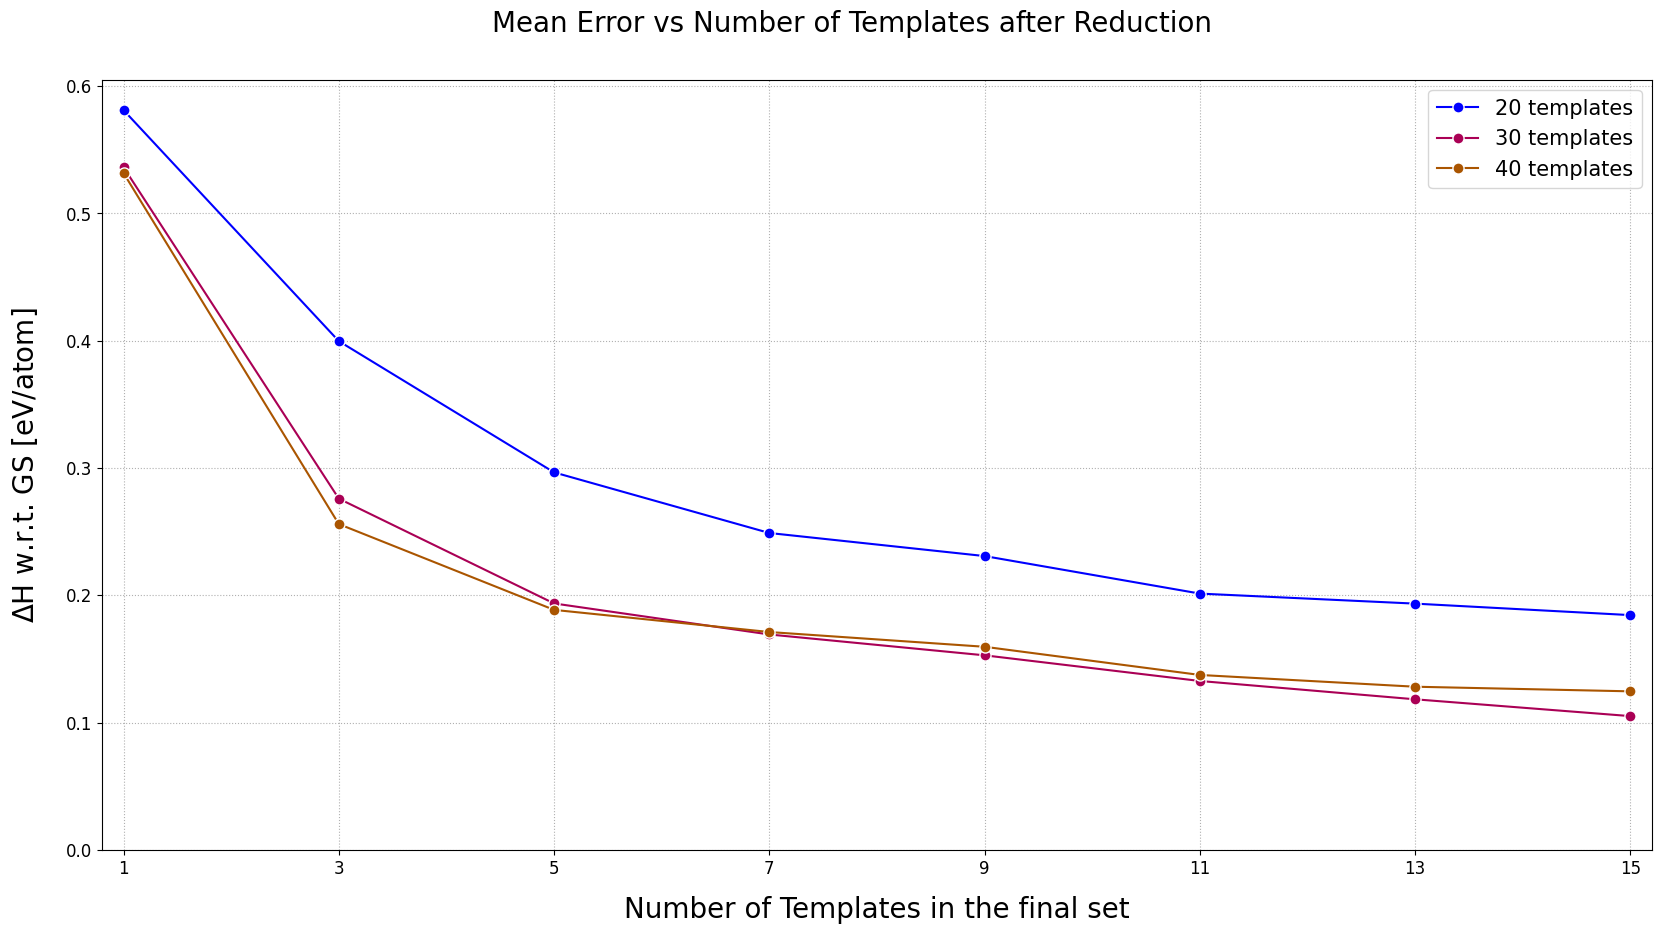

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

EnErr = np.zeros((2, 8, 77))

EnErr[0] = pd.read_csv('MeansFixedNFinal.csv', header=None, na_filter=False).to_numpy()
EnErr[1] = pd.read_csv('StdsFixedNFinal.csv', header=None, na_filter=False).to_numpy()
nmin , nmax = 1, 15+1

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
title = f'Mean Error vs Number of Templates after Reduction'
fig.suptitle(title, fontsize=20, y = 0.95)

for in_temp in range(20,50,10):
    color = cm.brg((in_temp-20)/(50-20))
    ax.plot(np.arange(nmin, nmax,2, dtype=int), EnErr[0, :, in_temp],color = color,  marker = 'o',markersize = 8,  markeredgecolor='white', label = f'{in_temp} templates')

xticks = np.arange(nmin, nmax,2, dtype=int)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=12)
ax.set_xlabel('Number of Templates in the final set', fontsize=20)
ax.xaxis.set_label_coords(0.5, -0.06)
ax.set_xlim(nmin-0.2, nmax-1+0.2 )

yticks = np.arange(0, 0.7, 0.1)
yticks = np.round(yticks, decimals=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)
ax.set_ylabel(r'$\Delta$H w.r.t. GS [eV/atom]', fontsize=20)
ax.yaxis.set_label_coords(-0.04, 0.5)

ax.legend(fontsize=15)
ax.grid(True, ls=':')

# JSON2CSV

In [43]:
import json
import os
import pandas as pd
import re

with open('A1B/relaxation/ent.json') as f:
    data = json.load(f)

columns = []
rows = []
for key in data['1'].keys():
    rows.append(key)
    for k in data['1'][key].keys():
        name = re.search(r'([A-Za-z]*)(\d+)', k).group(1)
        sg = re.search(r'([A-Za-z]*)(\d+)', k).group(2)
        if f'{name}_{sg}' not in columns:
            columns.append(f'{name}_{sg}')
    
df = pd.DataFrame(index=rows ,columns=columns)

for key in data['1'].keys():
    for k in data['1'][key].keys():
        name = re.search(r'([A-Za-z]*)(\d+)', k).group(1)
        sg = re.search(r'([A-Za-z]*)(\d+)', k).group(2)
        df.loc[key, f'{name}_{sg}'] = data['1'][key][k]

df.to_csv('A1B/relaxation/RELAX_DATA')
with open('A1B/relaxation/RELAX_DATA', 'r') as f:
    lines = f.readlines()
lines[0] = 'COUPLES' + lines[0]
with open('A1B/relaxation/RELAX_DATA', 'w') as f:
    f.writelines(lines)


# OCCURRENCE, FORMATION ENT, LEV DIST

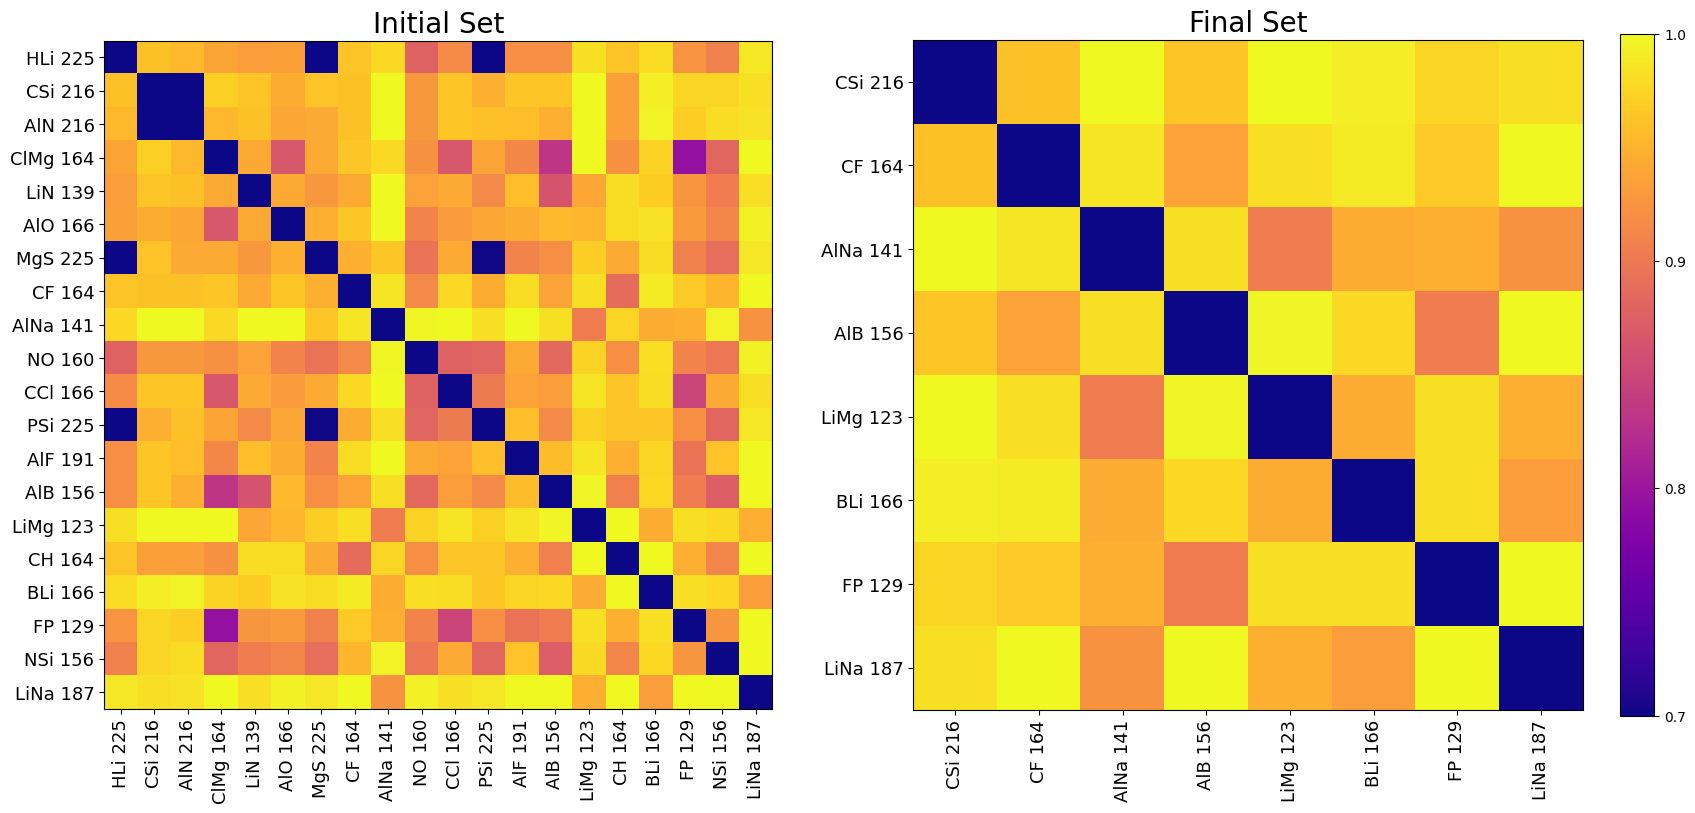

In [94]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULLTRY/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULLTRY/20/PairSet_0')
lev_dist = pair_set.dist_matrix()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,14), width_ratios=[11, 12.2])
title = f'Initial Set'
ax.set_title(title, fontsize=20)
im = ax.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_yticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13, rotation=90)
ax.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
lev_dist = np.delete(lev_dist, idx_to_remove, axis=0)
lev_dist = np.delete(lev_dist, idx_to_remove, axis=1)
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]

title = f'Final Set'
ax1.set_title(title, fontsize=20)
im = ax1.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
cbar = fig.colorbar(im, ax=ax1, orientation='vertical', fraction=0.046, pad=0.05, ticks = np.arange(0, 1.1, 0.1)) 
ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_yticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13, rotation=90)
ax1.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13)
plt.show()
fig.savefig('LevDistMat.png')

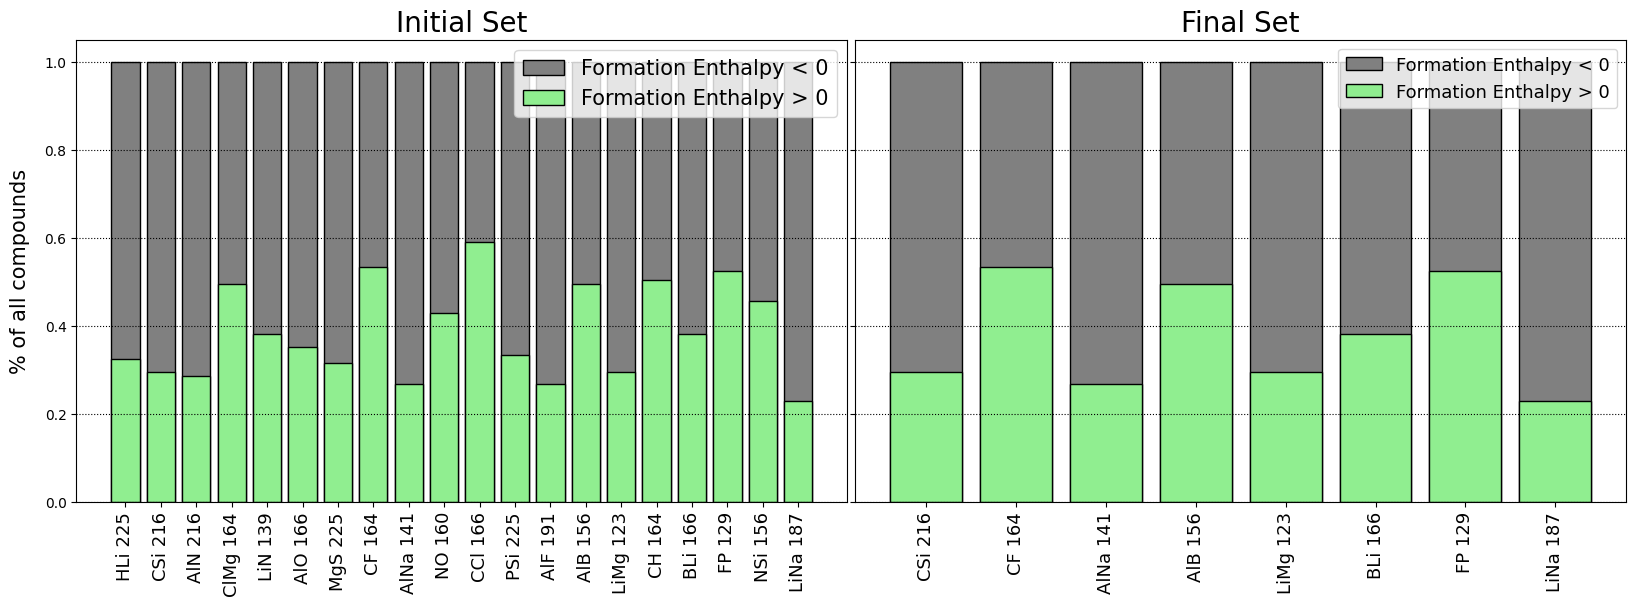

In [3]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULLTRY/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULLTRY/20/PairSet_0')
formation_enthalpy = pair_set.formation_percentage()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=20)
ax.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy < 0')
ax.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy > 0')

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13, rotation=90)
ax.legend(fontsize=15)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('% of all compounds', fontsize=15)
ax.yaxis.set_label_coords(-0.06, 0.5)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
formation_enthalpy = np.delete(formation_enthalpy, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=20)
ax1.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy < 0')
ax1.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy > 0')

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13, rotation=90)
ax1.legend(fontsize=13)
ax1.grid(True, ls=':', axis='y', color='black')

fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('FormationEnt.png')

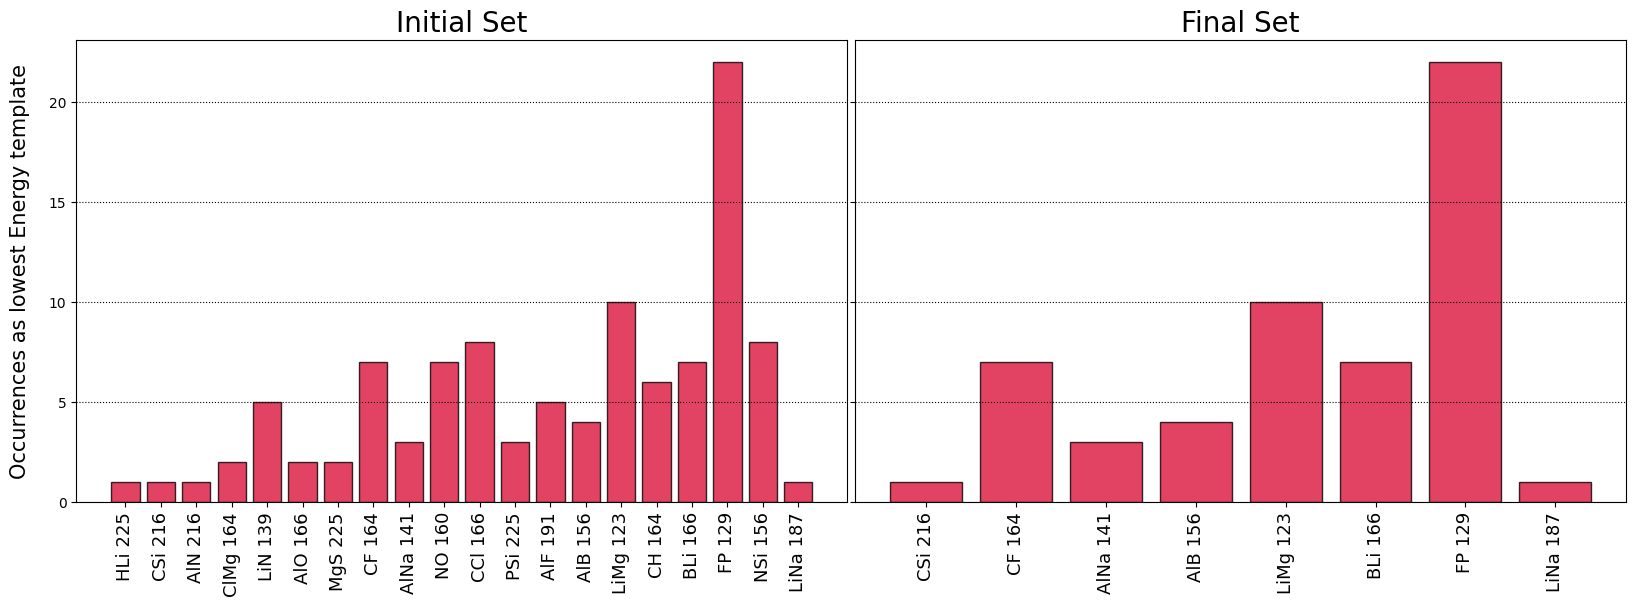

In [2]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULLTRY/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULLTRY/20/PairSet_0')
isto = pair_set.template_gs()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=20)
ax.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13, rotation=90)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('Occurrences as lowest Energy template', fontsize=15)
ax.yaxis.set_label_coords(-0.06, 0.5)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
isto = np.delete(isto, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=20)
ax1.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=13, rotation=90)
ax1.grid(True, ls=':', axis='y', color='black')

fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('Occurrence.png')